# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [160]:
# Dependencies and Setup

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
from scipy.stats import sem

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_combined = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')
# Display the data table for preview
mouse_study_combined.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [161]:
# Checking the number of mice.
mice = mouse_study_combined["Mouse ID"].value_counts()
number_of_mice = len(mice)
number_of_mice

249

In [162]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dupes = mouse_study_combined.loc[mouse_study_combined.duplicated(subset = ['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
dupes

array(['g989'], dtype=object)

In [163]:
# Optional: Get all the data for the duplicate mouse ID. 
dupe_g989_df = mouse_study_combined.loc[mouse_study_combined["Mouse ID"] == 'g989',]
dupe_g989_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [164]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
new_combined_df = mouse_study_combined[mouse_study_combined['Mouse ID'].isin(dupes) == False]
new_combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [165]:
# Checking the number of mice in the clean DataFrame.
new_mice = new_combined_df["Mouse ID"].value_counts()
number_of_mice = len(new_mice)
number_of_mice

248

## Summary Statistics

In [166]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
statistics_df = new_combined_df.groupby('Drug Regimen')
statistics_df
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
tumorvolume_mean = statistics_df['Tumor Volume (mm3)'].mean()
tumorvolume_median = statistics_df['Tumor Volume (mm3)'].median()
tumorvolume_std = statistics_df['Tumor Volume (mm3)'].std()
tumorvolume_sem = statistics_df['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary DataFrame.
summary_df = pd.DataFrame({'Mean': tumorvolume_mean, 
                          'Median': tumorvolume_median, 
                          'Standard Dev': tumorvolume_std, 
                         'SEM': tumorvolume_sem})

summary_df

,Mean,Median,Standard Dev,SEM
Drug Regimen,,,,
Capomulin,40.675741,41.557809,4.994774,0.329346
Ceftamin,52.591172,51.776157,6.268188,0.469821
Infubinol,52.884795,51.820584,6.567243,0.492236
Ketapril,55.235638,53.698743,8.279709,0.603860
Naftisol,54.331565,52.509285,8.134708,0.596466
Placebo,54.033581,52.288934,7.821003,0.581331
Propriva,52.320930,50.446266,6.622085,0.544332
Ramicane,40.216745,40.673236,4.846308,0.320955
Stelasyn,54.233149,52.431737,7.710419,0.573111


In [167]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line.
sum_aggr = new_combined_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
sum_aggr

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0, 0.5, '# of Mice')

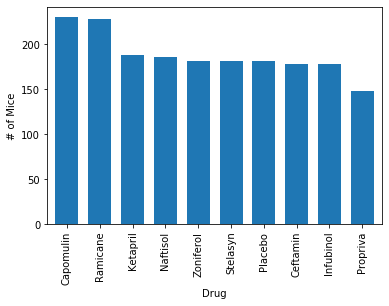

In [168]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
bar_data = new_combined_df['Drug Regimen'].value_counts().plot.bar(width=0.7, zorder=3)


plt.xlabel("Drug")
plt.ylabel("# of Mice")


Text(0.5, 1.0, 'Number of Data Points for Treatment')

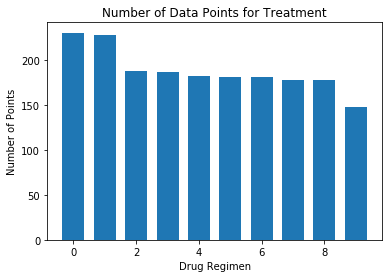

In [169]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

pyplot_data = new_combined_df['Drug Regimen'].value_counts()

x_axis = np.arange(len(pyplot_data))
plt.bar(x_axis, pyplot_data, width = 0.7, zorder=3)

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Points")
plt.title('Number of Data Points for Treatment')

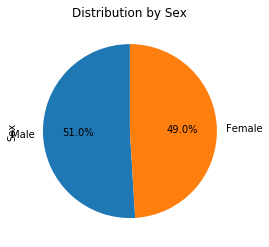

In [170]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
pie_data = new_combined_df['Sex'].value_counts()

pie_graph = pie_data.plot.pie(autopct="%1.1f%%", startangle=90, title='Distribution by Sex')


Text(0.5, 1.0, 'Distribution by Sex')

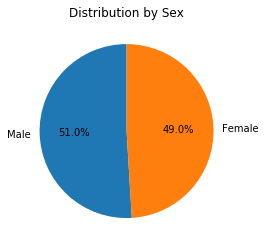

In [171]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
pypie_data = new_combined_df['Sex'].value_counts()

plt.pie(data, labels = pypie_data.index.values, autopct = "%1.1f%%", startangle=90)

plt.title('Distribution by Sex')


## Quartiles, Outliers and Boxplots

In [172]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

great_timepoint = pd.DataFrame(new_combined_df.groupby('Mouse ID')['Timepoint'].max().sort_values()).reset_index().rename(columns={'Timepoint': 'max_timepoint'})
great_timepoint

com_tum_df = pd.merge(new_combined_df, great_timepoint, on = 'Mouse ID')
com_tum_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,max_timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45
...,...,...,...,...,...,...,...,...,...
1875,z969,Naftisol,Male,9,30,25,63.145652,2,45
1876,z969,Naftisol,Male,9,30,30,65.841013,3,45
1877,z969,Naftisol,Male,9,30,35,69.176246,4,45
1878,z969,Naftisol,Male,9,30,40,70.314904,4,45


In [173]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset 
# Determine outliers using upper and lower bounds
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

treat_val = []

for drug in treatments:
    
    stats_df = com_tum_df.loc[com_tum_df['Drug Regimen'] == drug]
    
    vol_df = stats_df.loc[stats_df['Timepoint'] == stats_df['max_timepoint']]

    tomur = vol_df['Tumor Volume (mm3)']
    treat_val.append(tomur)
    
    #Need to remember to define all quarters. 
    quartiles = tomur.quantile([.25,.5,.75])
    lower = quartiles[0.25]
    upper = quartiles[0.75]
    #StackOverflow instructs to make as equation
    iqr = upperq-lowerq
    print(f'IQR for {drug}: {iqr}')
    
    lower_bound = lower - (1.5*iqr)
    upper_bound = upper + (1.5*iqr)
    print(f'Upper Bound {drug}: {upper_bound}')
    print(f'Lower Bound {drug}: {lower_bound}')
    
    

IQR for Capomulin: 15.577752179999997
Upper Bound Capomulin: 63.525848569999994
Lower Bound Capomulin: 9.010728570000001
IQR for Ramicane: 15.577752179999997
Upper Bound Ramicane: 64.02563454
Lower Bound Ramicane: 8.193841280000004
IQR for Infubinol: 15.577752179999997
Upper Bound Infubinol: 88.89237111999999
Lower Bound Infubinol: 30.68197942
IQR for Ceftamin: 15.577752179999997
Upper Bound Ceftamin: 87.66645829999999
Lower Bound Ceftamin: 25.355449580000002


([<matplotlib.axis.XTick at 0x7fdd700ae610>,
 <a list of 4 Text xticklabel objects>)

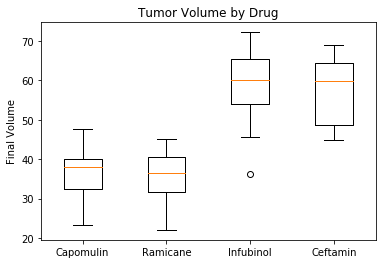

In [174]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(treat_val)

plt.title('Tumor Volume by Drug')
plt.ylabel('Final Volume')

plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])


## Line and Scatter Plots

Text(0.5, 0, 'Timepoint')

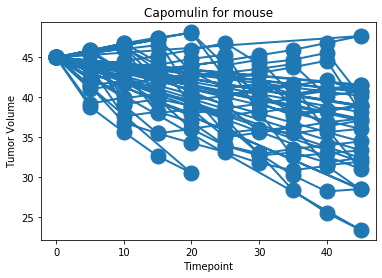

In [175]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

Cap_reg = mouse_study_combined.loc[mouse_study_combined["Drug Regimen"] == "Capomulin",:]

x_axis = Cap_reg["Timepoint"]
tumsiz = Cap_reg["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
plt.plot(x_axis, tumsiz,linewidth=2, markersize=15, marker="o", label="Fahreneit")
plt.title('Capomulin for mouse')
plt.ylabel('Tumor Volume')
plt.xlabel('Timepoint')
#confused on outcome of linegraph... Need to fix. Averages for one time point have to be defined. 

Text(0, 0.5, 'Average Tumor Vol')

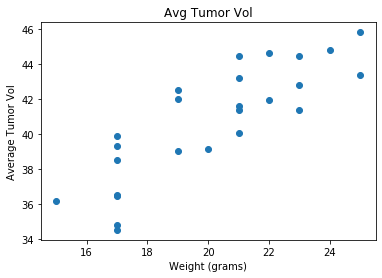

In [176]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
#Average

avg_vol_df = pd.DataFrame(Cap_reg.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)': 'avg_tumor_vol'})
#instructions point towards combining. 
new_avg_vol = pd.merge(Cap_reg, avg_vol_df, on='Mouse ID')
#workaround for cleaning up data. Instructor mentions dropping duplicates.
final_avg_vol_df = new_avg_vol[['Weight (g)', 'avg_tumor_vol']].drop_duplicates()


x = final_avg_vol_df['Weight (g)']
y = final_avg_vol_df['avg_tumor_vol']

#followDataCamp example from app
plt.scatter(x, y)
plt.title('Avg Tumor Vol')
plt.xlabel("Weight (grams)")
plt.ylabel("Average Tumor Vol")


## Correlation and Regression

The r-squared is: 0.7088568047708721


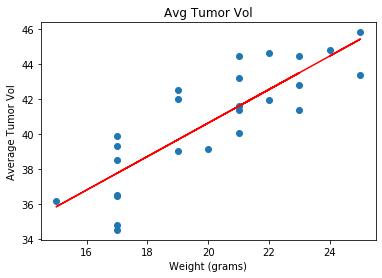

In [185]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
#video instructions state that the scatter plot needs to be duplicated. 

avg_vol_df = pd.DataFrame(Cap_reg.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)': 'avg_tumor_vol'})
new_avg_vol = pd.merge(Cap_reg, avg_vol_df, on='Mouse ID')
final_avg_vol_df = new_avg_vol[['Weight (g)', 'avg_tumor_vol']].drop_duplicates()

x = final_avg_vol_df['Weight (g)']
y = final_avg_vol_df['avg_tumor_vol']

#Zubairs example. Remember x,y inputs
correlation = st.pearsonr(x,y)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Need to remember regression
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")

plt.title('Avg Tumor Vol')
plt.xlabel("Weight (grams)")
plt.ylabel("Average Tumor Vol")

ax1.annotate(line_eq, xy=(20, 40), xycoords='data',xytext=(0.8, 0.95), textcoords='axes fraction',horizontalalignment='right', verticalalignment='top',fontsize=30,color="red")

print(f"The r-squared is: {rvalue**2}")